In [3]:
from pytrends.request import TrendReq

# creamos un objeto para interactuar
pytrends = TrendReq(hl = 'en-US') # hl = home language

# extraer informacion de las palabras claves
keywords = ['Python', 'R', 'C++', 'Java', 'HTML']  # existen una restriccion de 5 palabras por vez
pytrends.build_payload(keywords, timeframe='today 5-y') # los ultimos 5 anos (viene por defecto)

# ahora cargamos la info
data = pytrends.interest_over_time()
data

,Python,R,C++,Java,HTML,isPartial
date,,,,,,
2016-07-10,13,57,76,32,15,False
2016-07-17,14,60,78,34,15,False
2016-07-24,14,60,78,34,15,False
2016-07-31,14,59,78,33,15,False
2016-08-07,14,57,76,31,15,False
...,...,...,...,...,...,...
2021-05-30,23,48,87,19,10,False
2021-06-06,22,48,90,19,10,False
2021-06-13,22,47,84,19,10,False


In [6]:
type(data)

pandas.core.frame.DataFrame

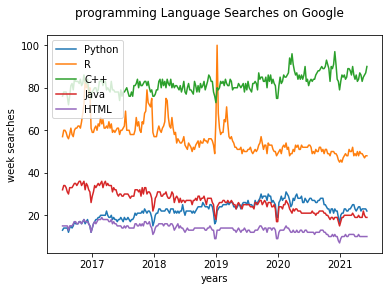

In [19]:
# ahora vamos a graficar la info
import matplotlib.pyplot as plt

# correcciones (presentaba problemas al intentar graficas la ultima columna)
columnas = list(data.columns)
data_fix = data[columnas[:-1]]
plt.plot(data_fix)

# añadir titulos
plt.suptitle('programming Language Searches on Google')
plt.xlabel('years')
plt.ylabel('week searches')

# añadir las leyendas
plt.legend(keywords, loc='upper left')
plt.show()
# luego si queremos guardar la imagen
#plt.savefig('data_fix.png')

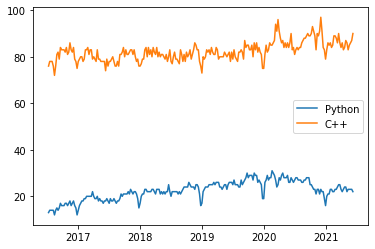

In [22]:
# analizar data
focus = ['Python', 'C++']

plt.plot(data_fix[focus])
plt.legend(focus)


In [25]:
# que paises tienen mas busquedas de python
data2 = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

data2 = data2['Python'].nlargest(10) # los dies paises con mas busquedas de python

# esta vez no estamos trabajando con un dataframe
type(data2)

# para convertirlo ejecutamos el siguiente comando
data2 = data2.to_frame()
data2

,Python
geoName,
China,48
Israel,34
Eritrea,29
St. Helena,27
Singapore,24
South Korea,23
Russia,21
Hong Kong,20
Iceland,20


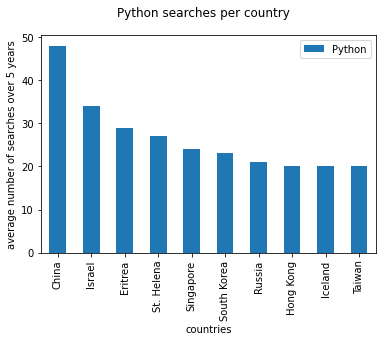

In [27]:
# para graficas con pandas
data2.plot(kind='bar')

# añadir titulos
plt.suptitle('Python searches per country')
plt.xlabel('countries')
plt.ylabel('average number of searches over 5 years')

plt.show()

In [29]:
data3 = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)
data3 = data3[55:60] # se toman 5 paises
data3 


,Python,R,C++,Java,HTML
geoName,,,,,
Cuba,17,14,36,21,12
Curaçao,7,31,49,7,6
Cyprus,13,22,43,12,10
Czechia,14,22,41,14,9
Côte d’Ivoire,5,16,50,23,6


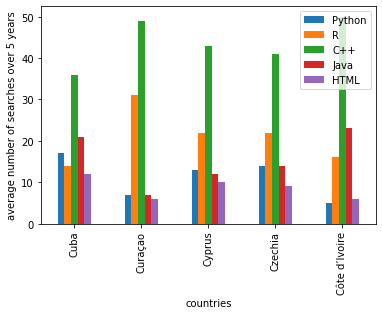

In [31]:
data3.plot(kind='bar')

plt.xlabel('countries')
plt.ylabel('average number of searches over 5 years')

plt.show()
